In [15]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import (AveragePooling2D, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D) 
from keras.utils import to_categorical
from keras.models import Model, Sequential
from sklearn.metrics import accuracy_score

In [24]:
def loadData():
    x = []
    y = []
    for i in os.scandir("data\captcha-digits"):
        if i.is_dir():
            print("Processing for digit: ",i.name)
            for j in os.scandir(i.path):
                #print(j.name)
                img = cv2.imread(j.path,0)
#                 cv2.imshow("img", img)
#                 cv2.waitKey(1)
#                 img = np.reshape(img, (20*20))
                x.append(img)
#                 x.append(np.reshape(img, (length, width, -1)))
                label = i.name
                y.append(int(label))
    x = np.array(x)
    y = np.array(y)
#     cv2.destroyAllWindows()
    return x,y
        
X,Y = loadData()

Processing for digit:  0
Processing for digit:  1
Processing for digit:  2
Processing for digit:  3
Processing for digit:  4
Processing for digit:  5
Processing for digit:  6
Processing for digit:  7
Processing for digit:  8
Processing for digit:  9


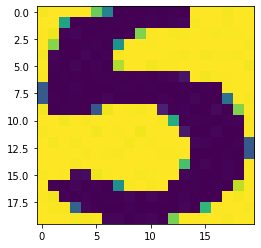

In [30]:
plt.imshow(X[1230])

In [31]:
print(X.shape,Y.shape)

(2180, 20, 20) (2180,)


In [32]:
# Flatten the images
image_vector_size = 20*20
X = X.reshape(X.shape[0], image_vector_size)
X.shape

(2180, 400)

In [33]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
Y = to_categorical(Y, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", Y[:5])

First 5 training lables as one-hot encoded vectors:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(X,yEnc)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1635, 400), (545, 400), (1635, 10), (545, 10))

In [35]:
input_shape = (400, ) #20*20
num_classes = 10 # ten unique digits

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model = Sequential([
    Dense(units=32, activation='sigmoid', input_shape=input_shape),
    Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,162
Trainable params: 13,162
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=1, epochs=15, verbose=True, validation_split=.1)

Train on 1471 samples, validate on 164 samples
Epoch 1/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2102 - accuracy: 0.1468 - val_loss: 2.2450 - val_accuracy: 0.1463
Epoch 2/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2066 - accuracy: 0.1598 - val_loss: 2.2889 - val_accuracy: 0.1463
Epoch 3/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2094 - accuracy: 0.1577 - val_loss: 2.2381 - val_accuracy: 0.1463
Epoch 4/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2079 - accuracy: 0.1584 - val_loss: 2.2638 - val_accuracy: 0.1402
Epoch 5/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2050 - accuracy: 0.1577 - val_loss: 2.2562 - val_accuracy: 0.1159
Epoch 6/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2090 - accuracy: 0.1509 - val_loss: 2.2054 - val_accuracy: 0.1159
Epoch 7/15
1471/1471 [==============================] - 2s 1ms/step - loss: 2.2064 - accu

In [48]:
#Evaluating over Training Data
loss, accuracy  = model.evaluate(xtest, y_test, verbose=False)
loss ,accuracy

1635/1635 [==============================] - 0s 223us/step


[4.544048624446997, 0.10642202198505402]

In [51]:
model.evaluate(xtest, ytest)

545/545 [==============================] - 0s 106us/step


[4.580890176055628, 0.10091742873191833]